In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

In [3]:
cdd_countdic = {}
for i in os.listdir('realrpsresults'):
    with open('realrpsresults/' + i) as f:
        for line in f:
            cdd = line.strip().split()[1].replace('CDD:','')
            if cdd not in cdd_countdic:
                cdd_countdic[cdd] = 1
            else:
                cdd_countdic[cdd] += 1

In [4]:
linkdic = {}
with open('virus_models_subset.tsv') as f:
    for line in f:
        esc = line.strip().split('\t')[1]
        acc = line.strip().split('\t')[0]
        linkdic[acc] = esc
linkdic

{'222768': 'A',
 '222769': 'B',
 '164773': 'D',
 '164774': 'E',
 '222770': 'J',
 '164775': 'F',
 '164776': 'G',
 '222771': 'I',
 '222772': 'IV',
 '164777': 'VII',
 '106880': 'IX',
 '222773': 'VIII',
 '133846': 'cp',
 '133847': 'lys',
 '222774': 'rep',
 '222775': 'PHA00080',
 '106886': 'VI',
 '164779': 'K',
 '222776': 'PHA00098',
 '164781': 'PHA00099',
 '177266': 'PHA00101',
 '222777': 'PHA00144',
 '133855': 'PHA00147',
 '222778': 'PHA00148',
 '222779': 'PHA00149',
 '177267': 'PHA00159',
 '222780': 'PHA00198',
 '177268': 'PHA00201',
 '164786': 'PHA00202',
 '164787': 'PHA00212',
 '222781': 'PHA00276',
 '106901': 'PHA00280',
 '164789': 'PHA00327',
 '222782': 'PHA00330',
 '222783': 'PHA00350',
 '177271': 'II',
 '222784': 'PHA00363',
 '222785': 'PHA00368',
 '164794': 'H',
 '164795': 'III',
 '222786': 'mat',
 '133872': 'PHA00380',
 '164796': 'PHA00404',
 '222787': 'PHA00405',
 '164797': 'PHA00406',
 '164798': 'PHA00407',
 '222788': '25',
 '133878': 'PHA00422',
 '164800': 'PHA00425',
 '164801

In [5]:
cdd_countdic_desc = {}
for i in cdd_countdic:
    if i in linkdic:
        newkey = linkdic[i]
        cdd_countdic_desc[newkey] = cdd_countdic[i]
    else:
        cdd_countdic_desc['NA'] = cdd_countdic[i]
cdd_countdic_desc

{'Herpes_glycop: Herpesvirus glycoprotein M': 1115,
 'ORF1_granulin': 964,
 'PHA03202': 6870,
 '52': 10017,
 'PHA03132': 10073,
 'PHA03225': 423,
 'Baculo_Y142: Baculovirus Y142 protein': 566,
 'Orbi_VP1: Orbivirus RNA-dependent RNA polymerase (VP1)': 1944,
 '39': 13719,
 'Reovirus_cap: Reovirus outer capsid protein, Sigma 3': 1509,
 'Peptidase_S32: Equine arteritis virus serine endopeptidase S32': 2065,
 'PHA03011': 143,
 'PHA03265': 1878,
 'PHA02778': 3947,
 'PHA00202': 1736,
 'Rubella_E1: Rubella membrane glycoprotein E1': 1441,
 'Herpes_LMP2: Gammaherpesvirus latent membrane protein (LMP2) protein': 3498,
 'PHA02518': 19197,
 'Pox_Rif: Poxvirus rifampicin resistance protein': 2183,
 'PPV_E1_C: Papillomavirus helicase': 4489,
 'Pox_VLTF3: Poxvirus Late Transcription Factor VLTF3 like': 274,
 'Herpes_UL6: Herpesvirus UL6 like': 2826,
 'PHA02776': 495,
 'Nairo_nucleo: Nucleocapsid N protein': 1521,
 'PHA00368': 11452,
 'PHA03180': 4025,
 'PHA00330': 1822,
 'DUF3725: Protein of unknown

In [6]:
worldlis = []
for i in cdd_countdic_desc:
    num = cdd_countdic_desc[i]
    templis = i.split(' ')
    worldlis.append(templis * int(num))

In [7]:
flat_list = [item for sublist in worldlis for item in sublist]
flat_list2 = []
for i in flat_list:
    if 'PHA' not in i:
        flat_list2.append(i)

In [10]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(' '.join(flat_list2))

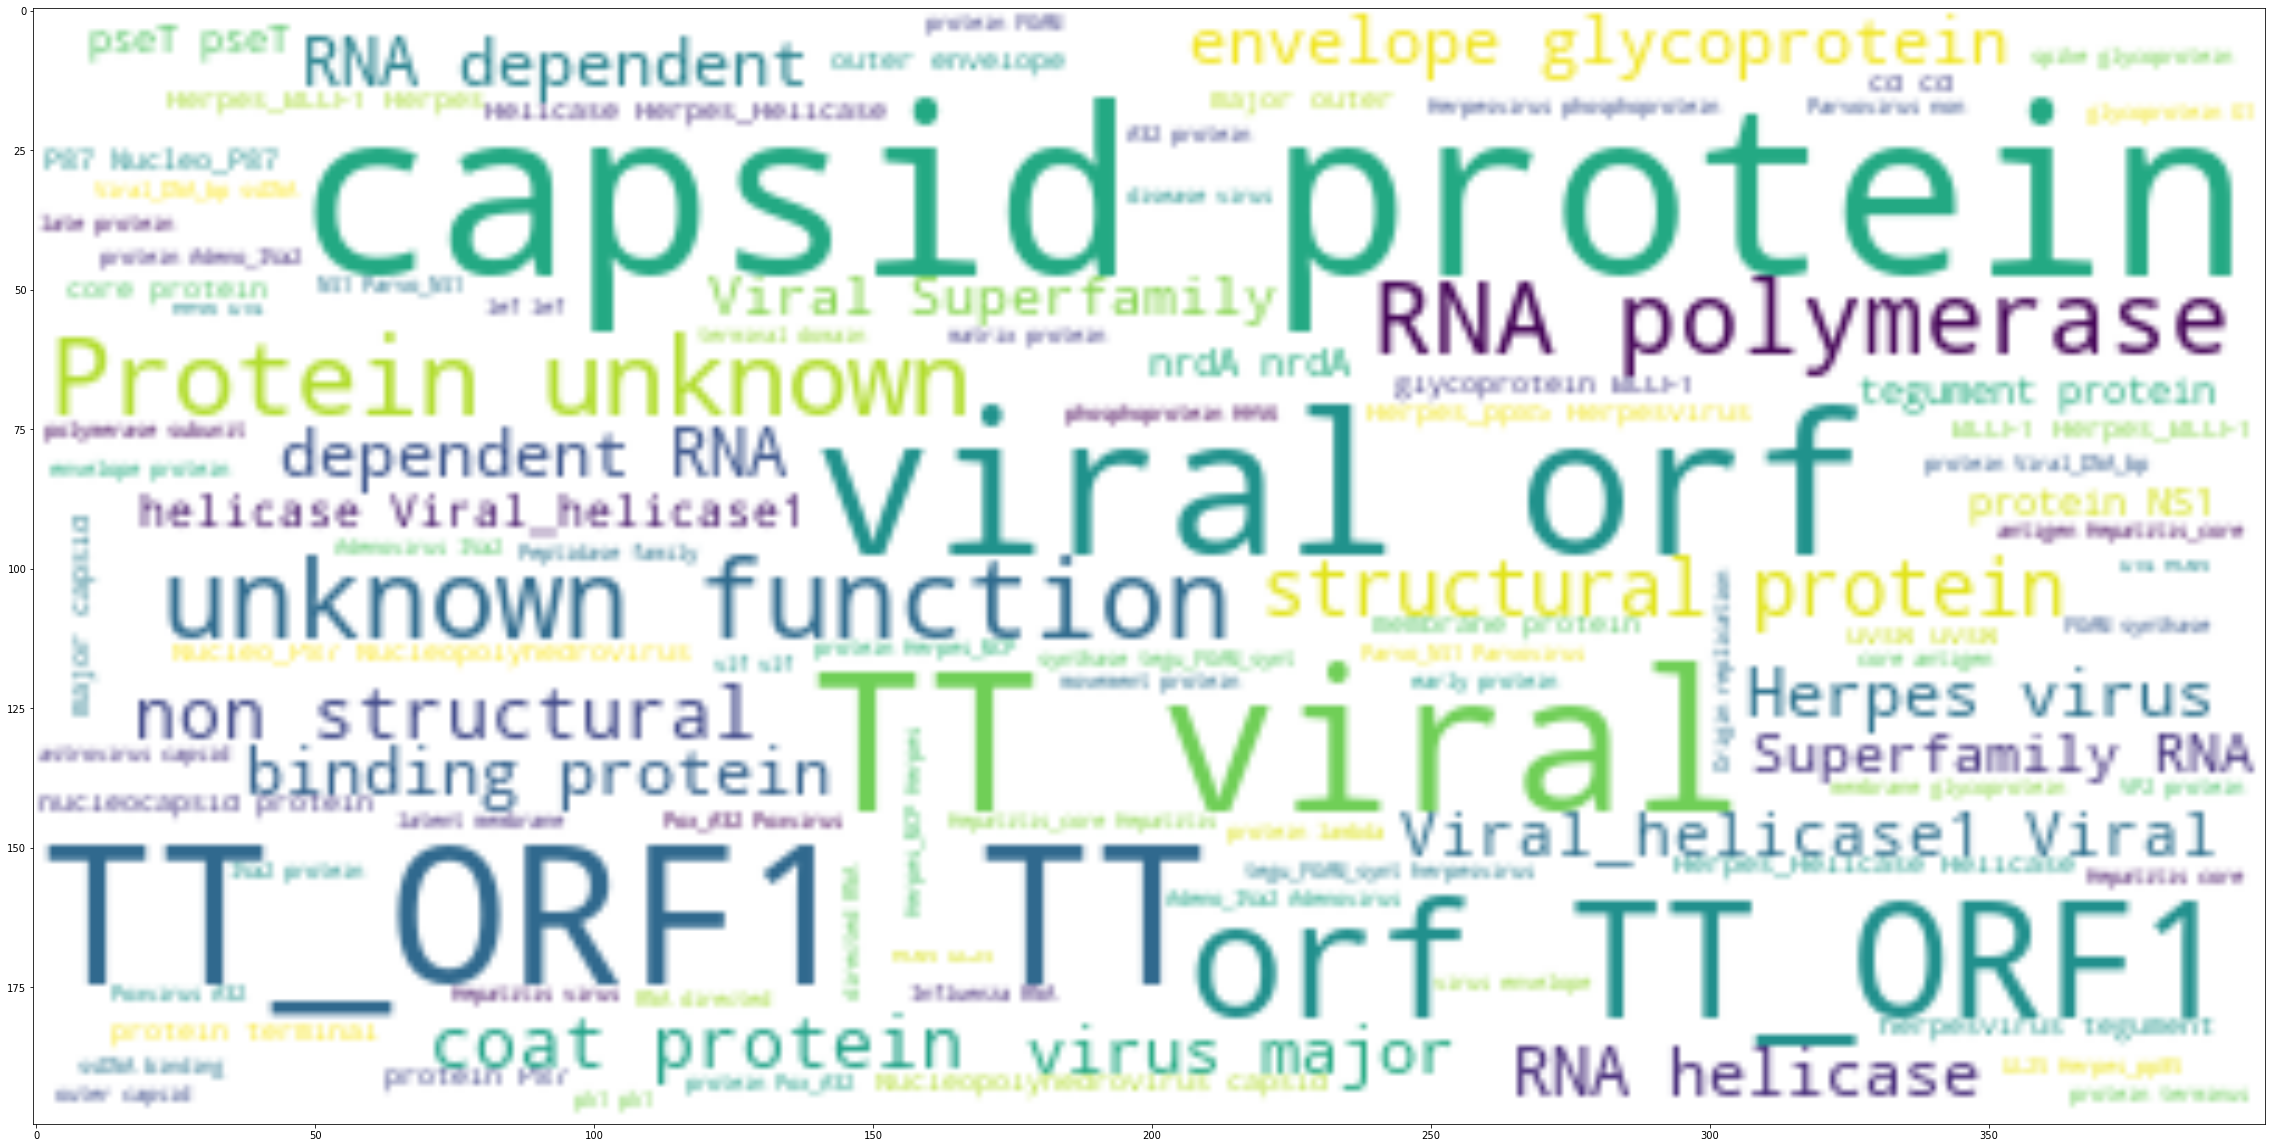

In [13]:
plt.figure(figsize=(40,40))
plt.imshow(wordcloud, interpolation='bilinear')